## Import Library & Load Dataset
Tahap awal adalah mengimpor semua library Python yang dibutuhkan untuk manipulasi data, visualisasi, dan pemodelan. Dataset film dan kredit kemudian dimuat dari file CSV yang diekstrak dari file ZIP.

In [45]:
import pandas as pd
import numpy as np
import ast
import zipfile
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel,cosine_similarity
from sklearn.preprocessing import MinMaxScaler
from scipy.sparse.linalg import svds

In [20]:
zip_path = 'archive (4).zip'  # nama file zip kamu
extract_folder = 'tmdb_dataset'

if not os.path.exists(extract_folder):
    os.makedirs(extract_folder)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print(f"File berhasil diekstrak ke folder: {extract_folder}")

File berhasil diekstrak ke folder: tmdb_dataset


In [21]:
# Cek isi folder hasil ekstraksi
print("Isi folder tmdb_dataset:")
print(os.listdir('tmdb_dataset'))

Isi folder tmdb_dataset:
['tmdb_5000_movies.csv', 'tmdb_5000_credits.csv']


In [22]:
# Load kedua dataset
movies_df = pd.read_csv('tmdb_dataset/tmdb_5000_movies.csv')
credits_df = pd.read_csv('tmdb_dataset/tmdb_5000_credits.csv')

print("✅ Dataset berhasil dimuat!")


✅ Dataset berhasil dimuat!


# Data Understanding

Pada tahap ini, dataset `movies_df` dan `credits_df` dieksplorasi untuk memahami struktur, isi, dan missing value. Langkah-langkahnya meliputi:
- Menampilkan info umum dan contoh data.
- Mengganti nama kolom di `credits_df` (`movie_id` ke `id`) untuk persiapan merge.
- Mengecek jumlah missing value.
- Menggabungkan kedua dataset menjadi `movies_df` berdasarkan kolom 'id'.

# Univariate Exploratory Data Analysis (EDA)

Setelah data digabung, kita melakukan analisis eksplorasi univariat untuk memahami distribusi dari fitur-fitur penting secara individual. Ini meliputi:
- Memvisualisasikan distribusi skor vote average film.
- Mengekstrak dan memvisualisasikan distribusi genre film.
- Memvisualisasikan distribusi runtime (durasi) film.
- Menampilkan 10 film terpopuler berdasarkan skor popularitas.
- Memvisualisasikan korelasi antara popularitas dan vote average.
- Menganalisis tren jumlah film yang dirilis setiap tahun.

In [23]:
# 4. Tampilkan info umum
print("\nInformasi Dataset Movies:")
print(movies_df.info())


Informasi Dataset Movies:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 

In [24]:
print("\nInformasi Dataset Credits:")
print(credits_df.info())


Informasi Dataset Credits:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB
None


In [25]:
# 5. Tampilkan contoh data
print("\nContoh Data Movies:")
print(movies_df.head(2))


Contoh Data Movies:
      budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   

                                       homepage     id  \
0                   http://www.avatarmovie.com/  19995   
1  http://disney.go.com/disneypictures/pirates/    285   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   

                                

In [26]:
print("\nContoh Data Credits:")
print(credits_df.head(2))


Contoh Data Credits:
   movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   

                                                crew  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...  


# Univariate Exploratory Data Analysis (EDA)




In [27]:
# Tampilkan semua kolom dataframe
pd.set_option('display.max_columns', None)

In [28]:
# Rename kolom supaya bisa merge
credits_df.rename(columns={'movie_id': 'id'}, inplace=True)

In [29]:
print("Jumlah missing value per kolom:\n", movies_df.isnull().sum())

Jumlah missing value per kolom:
 budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64


In [30]:
# Merge kedua dataset
movies_df = movies_df.merge(credits_df, on='id')

# Tampilkan beberapa baris pertama
movies_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


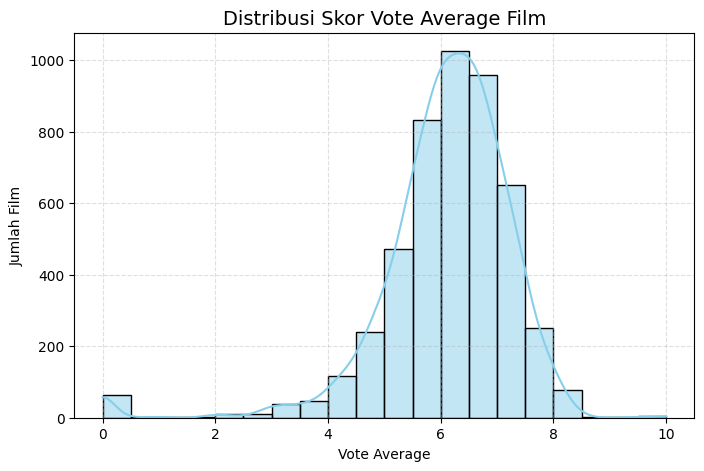

In [31]:
#Visualisasi Distribusi Rating Film
plt.figure(figsize=(8,5))
sns.histplot(movies_df['vote_average'], bins=20, kde=True, color='skyblue')
plt.title("Distribusi Skor Vote Average Film", fontsize=14)
plt.xlabel("Vote Average")
plt.ylabel("Jumlah Film")
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()


<ipython-input-32-5a33d0b69c09>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(genre_count.keys()), y=list(genre_count.values()), palette='viridis')


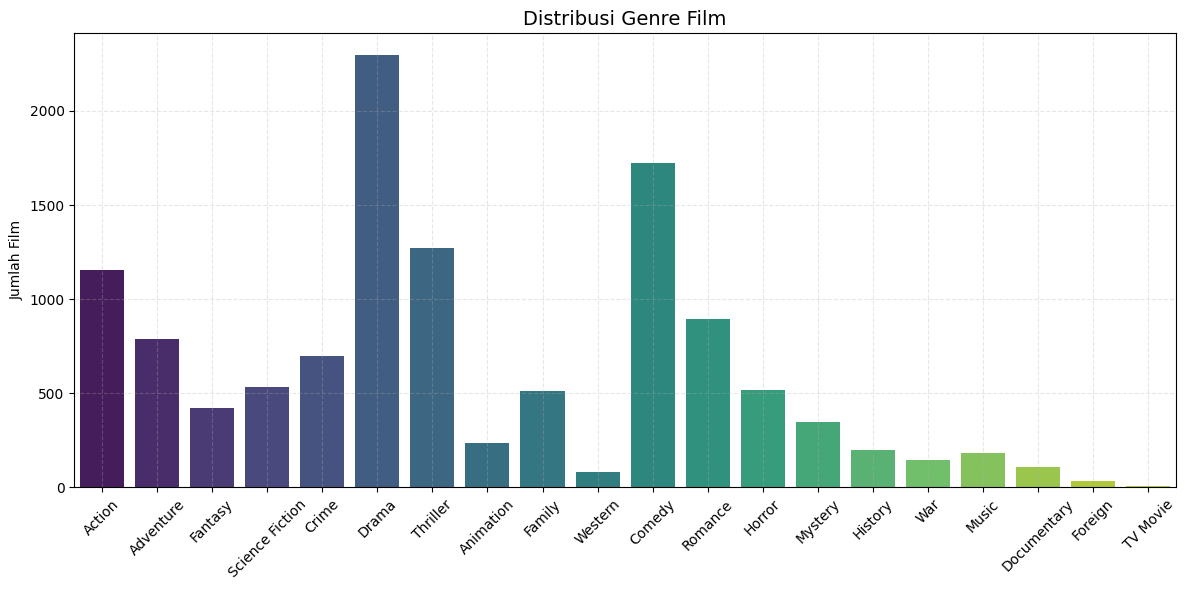

In [32]:
#Visualisasi Distribusi Genre
# Fungsi untuk parsing JSON-like text
def extract_genres(obj):
    try:
        return [d['name'] for d in ast.literal_eval(obj)]
    except:
        return []

movies_df['genres_list'] = movies_df['genres'].apply(extract_genres)

# Hitung semua genre
from collections import Counter
all_genres = sum(movies_df['genres_list'], [])
genre_count = Counter(all_genres)

# Visualisasi
plt.figure(figsize=(12,6))
sns.barplot(x=list(genre_count.keys()), y=list(genre_count.values()), palette='viridis')
plt.xticks(rotation=45)
plt.title("Distribusi Genre Film", fontsize=14)
plt.ylabel("Jumlah Film")
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


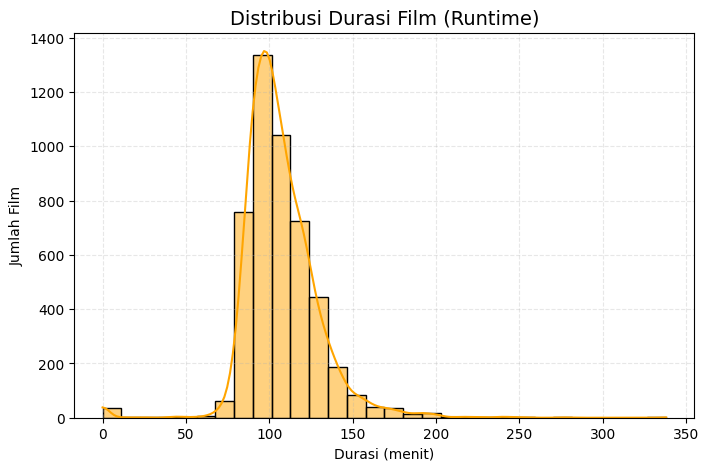

In [33]:
#Distribusi Runtime Film
plt.figure(figsize=(8, 5))
sns.histplot(movies_df['runtime'].dropna(), bins=30, color='orange', kde=True)
plt.title('Distribusi Durasi Film (Runtime)', fontsize=14)
plt.xlabel('Durasi (menit)')
plt.ylabel('Jumlah Film')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()


<ipython-input-34-ce536e549caa>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=popular_movies, x='popularity', y='title_x', palette='mako')


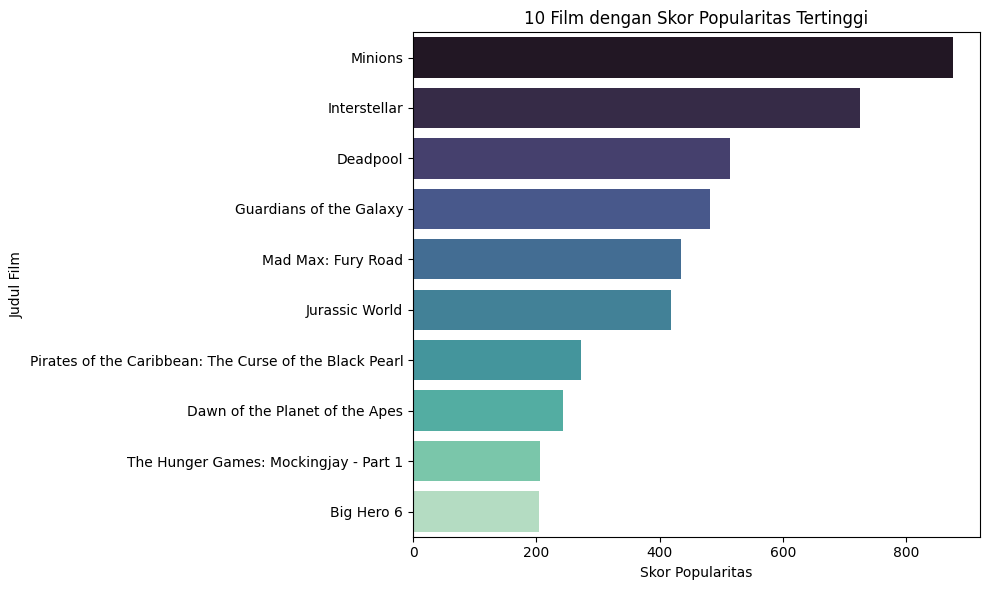

In [34]:
#10 Film Terpopuler Berdasarkan Popularitas
popular_movies = movies_df[['title_x', 'popularity']].sort_values(by='popularity', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=popular_movies, x='popularity', y='title_x', palette='mako')
plt.title("10 Film dengan Skor Popularitas Tertinggi")
plt.xlabel("Skor Popularitas")
plt.ylabel("Judul Film")
plt.tight_layout()
plt.show()


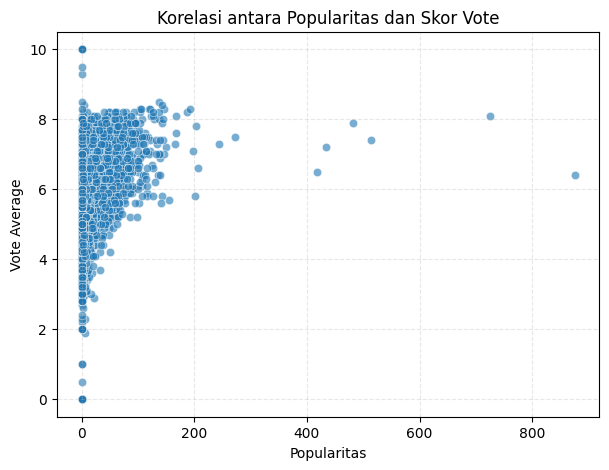

In [35]:
#Korelasi: Popularitas vs Vote Average
plt.figure(figsize=(7, 5))
sns.scatterplot(data=movies_df, x='popularity', y='vote_average', alpha=0.6)
plt.title("Korelasi antara Popularitas dan Skor Vote")
plt.xlabel("Popularitas")
plt.ylabel("Vote Average")
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()


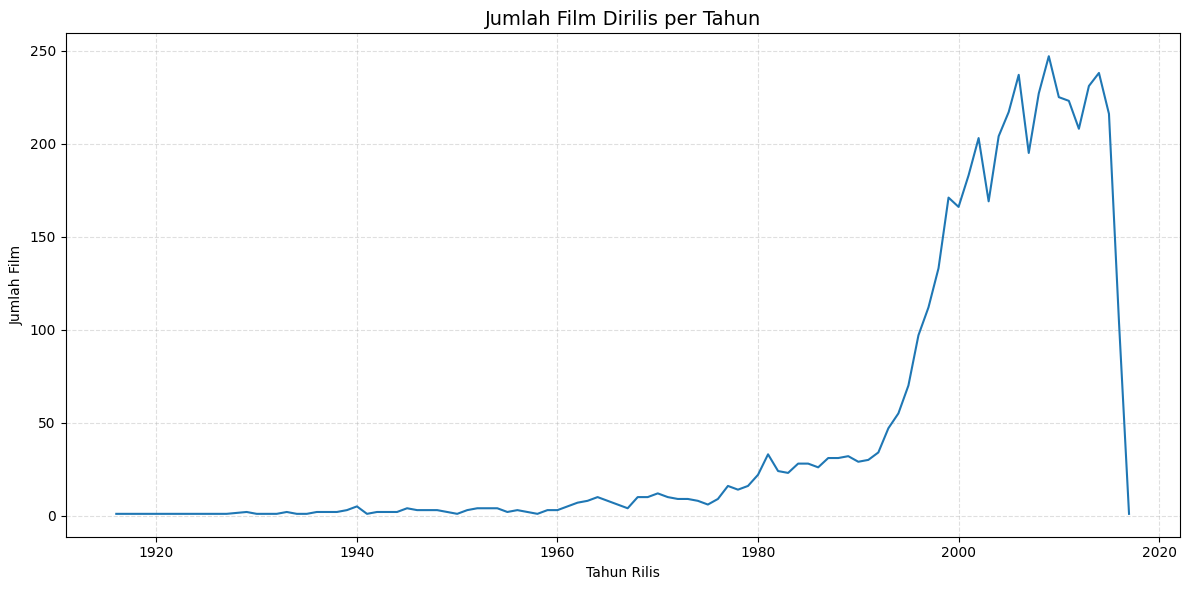

In [36]:
#Jumlah Film Tiap Tahun

# Pastikan kolom release_date berupa datetime
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'], errors='coerce')
movies_df['release_year'] = movies_df['release_date'].dt.year

# Hitung jumlah film per tahun
film_per_year = movies_df['release_year'].value_counts().sort_index()

plt.figure(figsize=(12,6))
sns.lineplot(x=film_per_year.index, y=film_per_year.values)
plt.title("Jumlah Film Dirilis per Tahun", fontsize=14)
plt.xlabel("Tahun Rilis")
plt.ylabel("Jumlah Film")
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


# Data Preprocessing
Tahap ini fokus pada persiapan data untuk pemodelan:
- Menghapus kolom yang tidak relevan ('homepage').
- Mengisi missing value pada kolom tekstual ('overview', 'tagline') dengan string kosong.
- Menghapus baris dengan missing value pada 'release_date'.
- Mengisi missing value pada 'runtime' dengan nilai median.
- Mengekstrak informasi relevan (nama genre, kata kunci, pemeran, sutradara) dari kolom yang formatnya mirip JSON string.
- Membersihkan data yang diekstrak (menghilangkan spasi dan mengubah ke huruf kecil).
- Menggabungkan semua fitur yang relevan ('genres', 'keywords', 'cast', 'crew', 'overview') menjadi satu kolom baru bernama 'tags'. Kolom 'tags' ini akan digunakan sebagai input untuk membangun model content-based.
- Membuat DataFrame baru (`movie_data`) yang hanya berisi kolom 'id', 'title', dan 'tags', serta menghapus duplikat berdasarkan judul film.


In [37]:
# 1. Drop kolom homepage karena tidak relevan
movies_df.drop(columns=['homepage'], inplace=True)

# 2. Isi missing value overview dan tagline dengan string kosong
movies_df['overview'] = movies_df['overview'].fillna('')
movies_df['tagline'] = movies_df['tagline'].fillna('')

# 3. Drop baris dengan release_date kosong (jumlahnya sangat kecil)
movies_df = movies_df.dropna(subset=['release_date'])

# 4. Isi runtime yang kosong dengan median runtime
runtime_median = movies_df['runtime'].median()
movies_df['runtime'] = movies_df['runtime'].fillna(runtime_median)

# Cek ulang apakah masih ada missing value
print("✅ Missing value setelah dibersihkan:\n")
print(movies_df.isnull().sum())


✅ Missing value setelah dibersihkan:

budget                  0
genres                  0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
tagline                 0
title_x                 0
vote_average            0
vote_count              0
title_y                 0
cast                    0
crew                    0
genres_list             0
release_year            0
dtype: int64


In [38]:
#Proses Ekstraksi dan Pembersihan Data
# Parsing data bertipe list/dictionary (JSON string)
# Fungsi bantu
def parse_names(text):
    try:
        return [i['name'] for i in ast.literal_eval(text)]
    except:
        return []

def get_top_cast(text):
    try:
        return [i['name'] for i in ast.literal_eval(text)[:3]]  # ambil 3 aktor
    except:
        return []

def get_director(text):
    try:
        for i in ast.literal_eval(text):
            if i.get('job') == 'Director':
                return i['name']
        return ''
    except:
        return ''


In [39]:
movies_df['genres'] = movies_df['genres'].apply(parse_names)
movies_df['keywords'] = movies_df['keywords'].apply(parse_names)
movies_df['cast'] = movies_df['cast'].apply(get_top_cast)
movies_df['crew'] = movies_df['crew'].apply(get_director)


In [40]:
def clean_list(x):
    if isinstance(x, list):
        return [i.replace(" ", "").lower() for i in x]
    elif isinstance(x, str):
        return x.replace(" ", "").lower()
    return ''

movies_df['genres'] = movies_df['genres'].apply(clean_list)
movies_df['keywords'] = movies_df['keywords'].apply(clean_list)
movies_df['cast'] = movies_df['cast'].apply(clean_list)
movies_df['crew'] = movies_df['crew'].apply(clean_list)


In [41]:
# Pastikan overview tidak kosong
movies_df['overview'] = movies_df['overview'].fillna('')

# Gabungkan fitur jadi satu string
movies_df['tags'] = movies_df.apply(
    lambda x: ' '.join(x['genres']) + ' ' +
              ' '.join(x['keywords']) + ' ' +
              ' '.join(x['cast']) + ' ' +
              x['crew'] + ' ' +
              x['overview'],
    axis=1
)


In [42]:
movie_data = movies_df[['id', 'title_x', 'tags']].copy()
movie_data.rename(columns={'title_x': 'title'}, inplace=True)
movie_data.head(3)


,id,title,tags
0,19995,Avatar,action adventure fantasy sciencefiction cultur...
1,285,Pirates of the Caribbean: At World's End,adventure fantasy action ocean drugabuse exoti...
2,206647,Spectre,action adventure crime spy basedonnovel secret...


# Data Preparation
Data 'tags' yang telah disiapkan perlu diubah menjadi format numerik agar bisa diukur kesamaannya.
- Menggunakan `TfidfVectorizer` untuk mengubah teks pada kolom 'tags' menjadi matriks representasi TF-IDF. Ini dilakukan dengan membatasi jumlah fitur (kata) dan menghapus *stop words* bahasa Inggris.
- Menghitung matriks kesamaan (similarity matrix) antar semua film berdasarkan matriks TF-IDF menggunakan `cosine_similarity`. Matriks ini menunjukkan seberapa mirip setiap film dengan film lainnya.

In [43]:
# Buat vectorizer dan batasi jumlah fitur (bisa disesuaikan)
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')

# Fit dan transform kolom 'tags' menjadi vektor numerik
tfidf_matrix = tfidf.fit_transform(movie_data['tags'])

# Cek bentuk matriks TF-IDF
print("✅ TF-IDF Matrix Shape:", tfidf_matrix.shape)


✅ TF-IDF Matrix Shape: (4802, 5000)


In [46]:
# Menghitung cosine similarity antar semua film
similarity = cosine_similarity(tfidf_matrix)

# Cek bentuk similarity matrix
print("✅ Cosine Similarity Matrix Shape:", similarity.shape)


✅ Cosine Similarity Matrix Shape: (4802, 4802)


#  Model Development - Content-Based Filtering
Dengan matriks kesamaan yang telah dihitung, kita bisa membangun fungsi rekomendasi:
- Membuat fungsi `recommend()` yang menerima judul film sebagai input.
- Fungsi ini akan mencari indeks film tersebut dalam DataFrame `movie_data`.
- Mengambil baris kesamaan yang sesuai dari `similarity_matrix` untuk film tersebut.
- Mengurutkan film berdasarkan skor kesamaan secara menurun.
- Mengabaikan film itu sendiri (skor kesamaannya 1.0) dan mengambil sejumlah film teratas (*top_n*).


In [47]:
def recommend(title, top_n=5):
    title = title.lower()
    if title not in movie_data['title'].str.lower().values:
        return f"🎬 Film '{title}' tidak ditemukan dalam dataset."

    index = movie_data[movie_data['title'].str.lower() == title].index[0]
    distances = list(enumerate(similarity[index]))
    sorted_distances = sorted(distances, key=lambda x: x[1], reverse=True)[1:top_n+1]

    print(f"\n📽️ Rekomendasi film mirip dengan '{movie_data.iloc[index].title}':")
    for i, (idx, score) in enumerate(sorted_distances, 1):
        print(f"{i}. {movie_data.iloc[idx].title} (Similarity: {score:.2f})")


In [49]:
def evaluate_recommendation(title, top_n=5):
    title_lower = title.lower()
    if title_lower not in movie_data['title'].str.lower().values:
        print(f"Film '{title}' tidak ditemukan dalam dataset.")
        return

    index = movie_data[movie_data['title'].str.lower() == title_lower].index[0]
    distances = list(enumerate(similarity[index]))
    sorted_distances = sorted(distances, key=lambda x: x[1], reverse=True)[1:top_n+1]

    recommended_titles = [movie_data.iloc[idx].title for idx, score in sorted_distances]
    similarity_scores = [score for idx, score in sorted_distances]

    print(f"Rekomendasi untuk film '{title}':")
    for i, (rec_title, score) in enumerate(zip(recommended_titles, similarity_scores), 1):
        print(f"{i}. {rec_title} (Similarity: {score:.4f})")

    avg_similarity = np.mean(similarity_scores)
    print(f"\nRata-rata skor similarity dari rekomendasi: {avg_similarity:.4f}")


# Contoh pemakaian evaluasi
evaluate_recommendation("The Dark Knight", top_n=5)


Rekomendasi untuk film 'The Dark Knight':
1. The Dark Knight Rises (Similarity: 0.4447)
2. Batman Returns (Similarity: 0.3714)
3. Batman Begins (Similarity: 0.3497)
4. Batman: The Dark Knight Returns, Part 2 (Similarity: 0.2955)
5. Batman Forever (Similarity: 0.2881)

Rata-rata skor similarity dari rekomendasi: 0.3499
